In [4]:
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase

Without padding.

In [5]:
import numpy as np
sampling = 0.2 # Angstrom

input_phase_raw = np.load("../object_phase.npy")
output_phase = np.angle(np.load(r"d:\Users\yiran.lu\Nextcloud\113 - SimpleSim\SamplePNGScikit\results\task_SimpleSimScikit_ePIE_padding_1\final_trans_rot.npy"))
output_phase = unwrap_phase(np.angle(output_phase) - 1.8)

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
output_phase = (output_phase - np.pi + np.pi) % (2*np.pi) - np.pi
output_phase[output_phase > np.pi] -= 2 * np.pi
output_phase[output_phase <= -np.pi] += 2 * np.pi

input_phase = input_phase_raw[70:425, (70-2):(425-2)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (355, 355)
output_phase: shape  (356, 356)


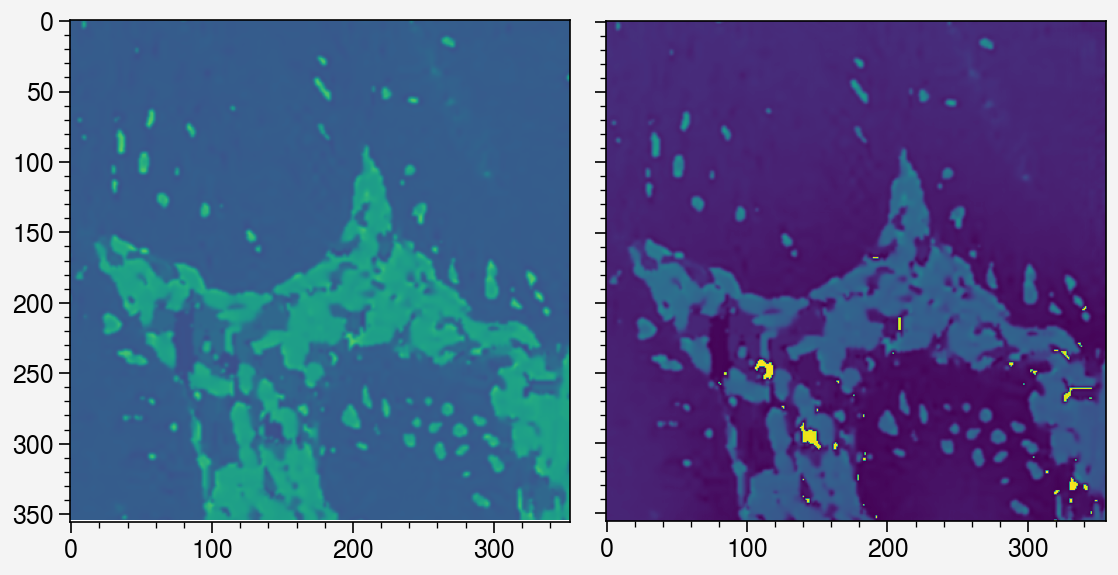

In [3]:
import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi, vmax=np.pi, cyclic=True, cmap="viridis")
ax2 = fig.subplot(122)
ax2.imshow(output_phase, vmin=-np.pi, vmax=np.pi, cyclic=True, cmap="viridis")

In [ ]:
output_phase -

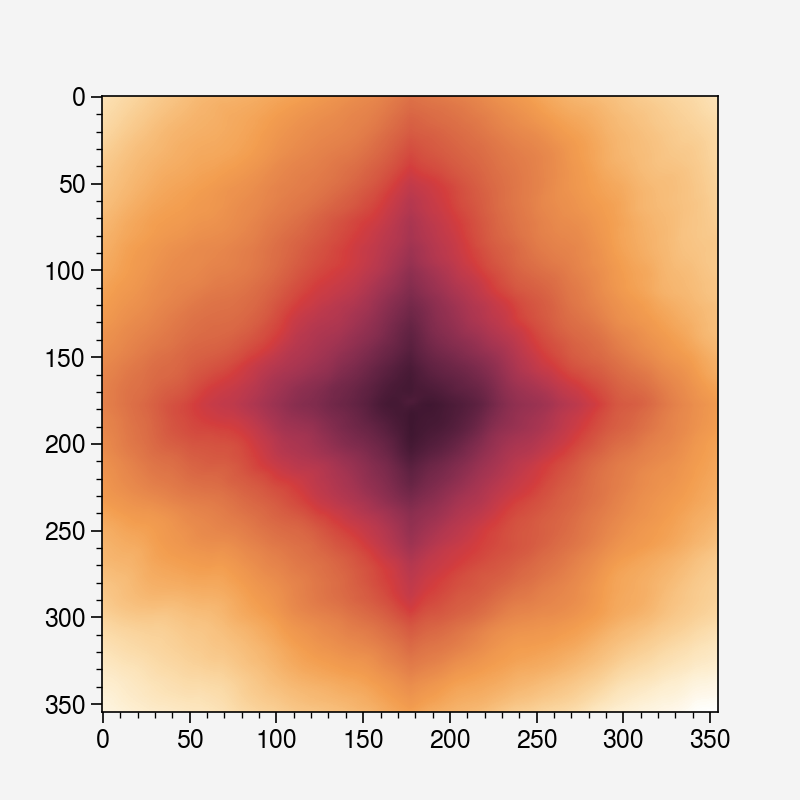

In [19]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
plt.imshow(cross_correlation)
#[signal.find_peaks(cross_correlation[i,:]) for i in range(cross_correlation.shape[0])]
#signal.find_peaks(cross_correlation[:,177])
peak = (175, 177) # thus the image is shift by 2 pixels in x axis

In [24]:
np.sum(np.abs(np.abs(output_phase - input_phase)))/np.sum(np.abs(output_phase))

0.15995551799482804

padding factor = 2.

In [25]:
import numpy as np
sampling = 0.2 # Angstrom

input_phase_raw = np.load("object_phase.npy")
output_phase = np.angle(np.load("results/task_SimpleSim_PtyPy_DM_200_ML_200_padding_2/final_trans_rot_0400.npy"))
output_phase = output_phase[::2,::2]

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
output_phase = (output_phase - np.pi + np.pi) % (2*np.pi) - np.pi
output_phase[output_phase > np.pi] -= 2 * np.pi
output_phase[output_phase <= -np.pi] += 2 * np.pi

input_phase = input_phase_raw[70:425, (70-2):(425-2)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (355, 355)
output_phase: shape  (355, 355)


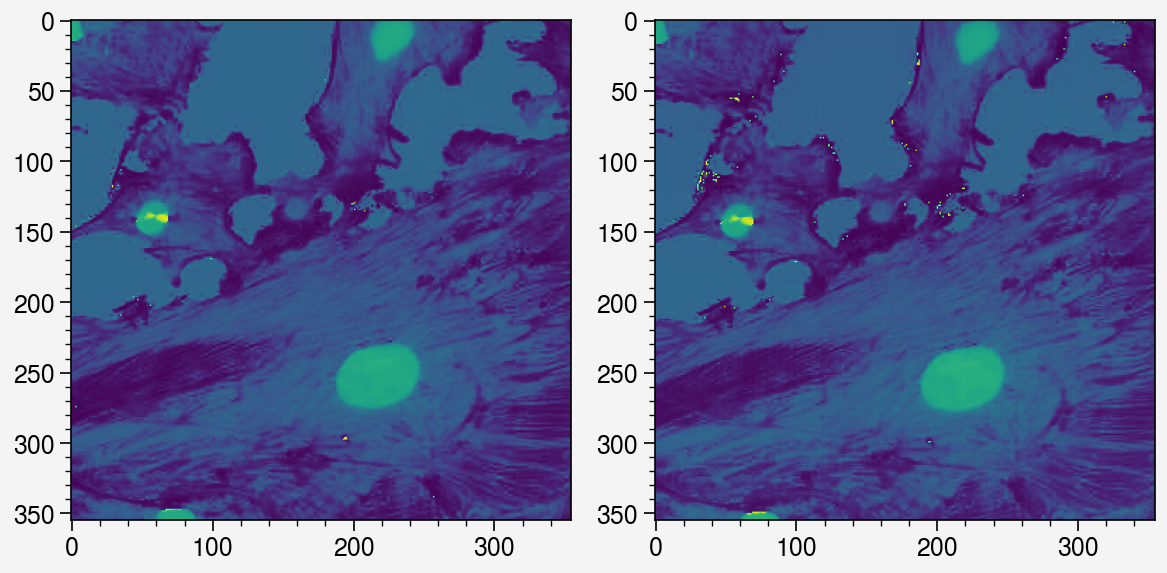

In [26]:
import proplot as pplt

fig = pplt.figure(share=False)
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi, vmax=np.pi, cyclic=True, cmap="viridis")
ax2 = fig.subplot(122)
ax2.imshow(output_phase, vmin=-np.pi, vmax=np.pi, cyclic=True, cmap="viridis")

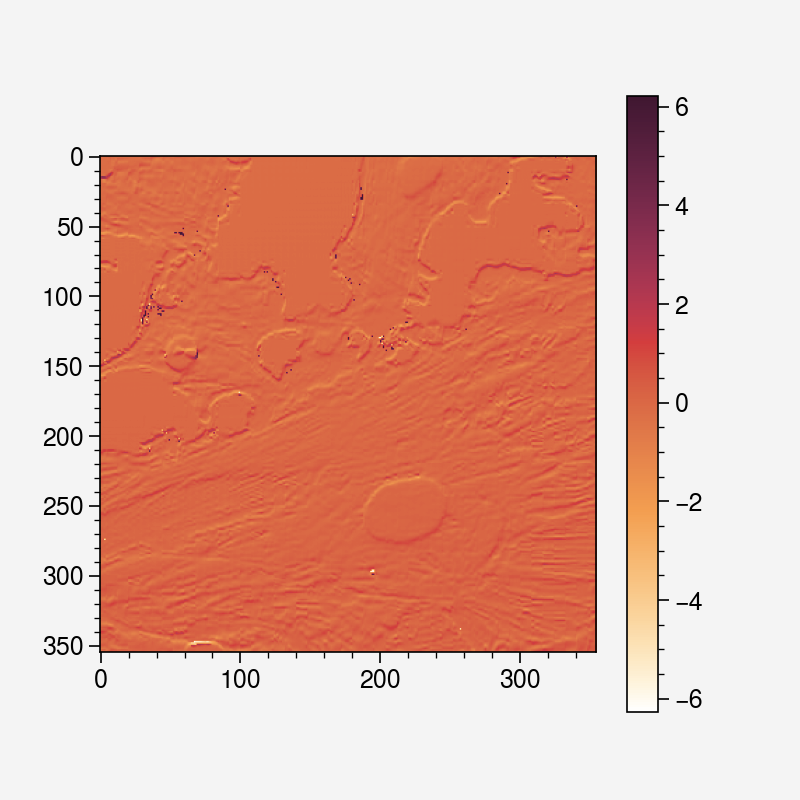

In [28]:
plt.imshow(output_phase - input_phase)
plt.colorbar()

(array([175], dtype=int64), {})

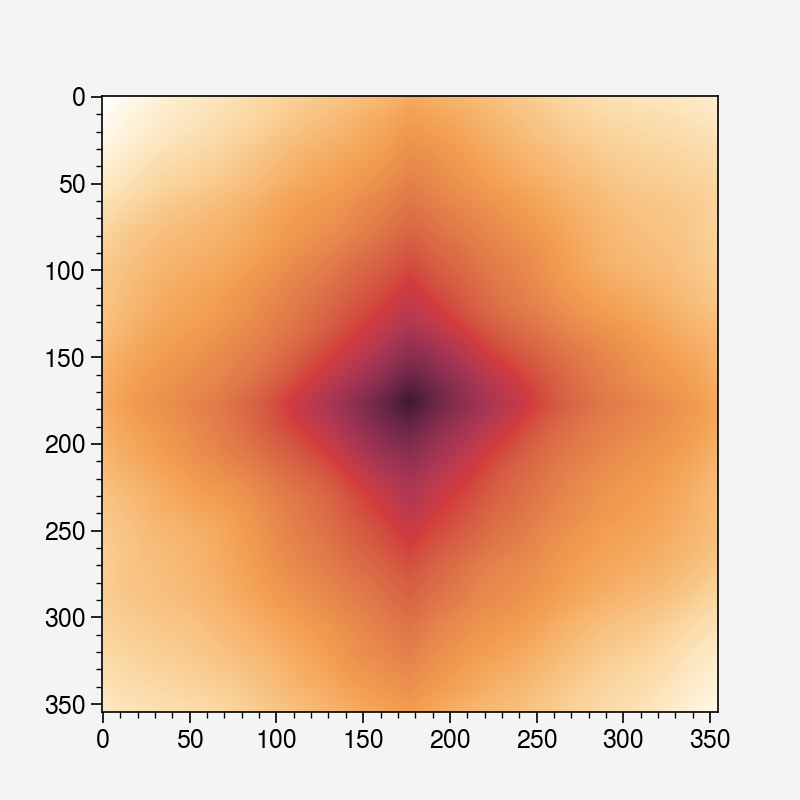

In [29]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
plt.imshow(cross_correlation)
[signal.find_peaks(cross_correlation[i,:]) for i in range(cross_correlation.shape[0])]
signal.find_peaks(cross_correlation[:,177])
peak = (175, 177) # thus the image is shift by 2 pixels in x axis

In [14]:
np.sum(np.abs(np.abs(output_phase - input_phase)))/np.sum(np.abs(output_phase))

0.14729443638347195